In [1]:
%pylab inline --no-import-all
from skimage.feature import local_binary_pattern
from skimage import data
# from skimage.viewer import ImageViewer
import cv2
import os
from scipy.stats import itemfreq
from sklearn.preprocessing import normalize
import cvutils
import csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import model_selection 

Populating the interactive namespace from numpy and matplotlib


In [2]:
im = 'cropped/4036/peakpoint/059.bmp'
im  =cv2.imread(im)
height, width = im.shape[:2]
height

241

In [8]:
import platform
import sys
from sklearn.preprocessing import label_binarize
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import time
from scipy.stats import randint as sp_randint
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, cohen_kappa_score, make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, SCORERS
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.externals import joblib
from operator import itemgetter
from tabulate import tabulate

In [20]:
print('Operating system version....', platform.platform())
print("Python version is........... %s.%s.%s" % sys.version_info[:3])
print('scikit-learn version is.....', sklearn.__version__)
print('pandas version is...........', pd.__version__)
print('numpy version is............', np.__version__)
print('matplotlib version is.......', matplotlib.__version__)

('Operating system version....', 'Linux-4.4.93-boot2docker-x86_64-with-Ubuntu-16.04-xenial')
Python version is........... 2.7.12
('scikit-learn version is.....', '0.19.1')
('pandas version is...........', u'0.21.0')
('numpy version is............', '1.14.0')
('matplotlib version is.......', '2.1.0')


In [22]:
class Timer:
    def __init__(self):
        self.start = time.time()
    def restart(self):
        self.start = time.time()
    def get_time(self):
        end = time.time()
        m, s = divmod(end - self.start, 60)
        h, m = divmod(m, 60)
        time_str = "%02d:%02d:%02d" % (h, m, s)
        return time_str

In [3]:
def Correlation_plot(df):
    plt.ioff()
    red_green = ["#ff0000", "#00ff00"]
    sns.set_palette(red_green)
    np.seterr(divide='ignore', invalid='ignore')
    g = sns.pairplot(df,
                     diag_kind = 'kde',
                     hue = 'Altitude',
                     markers = ["o", "D"],
                     size = 1.5,
                     aspect = 1,
                     plot_kws = {"s": 6})
    g.fig.subplots_adjust(right = 0.9)
    plt.show()

In [3]:
import os
root = 'cropped/'
train_images = []
for item in os.listdir(root):
#     print item
    check = os.path.isfile(os.path.join(root, item))
    if check ==False:
        path= os.path.join(root, item)
        for a in os.listdir(path):
#             print a
            check1 = os.path.isfile(os.path.join(path, a))
            if check1 == False:
                path1 =os.path.join(path,a)
                train = cvutils.imlist(path1)
                train_images = train_images +train
                for b in os.listdir(path1):
#                     print path1
#                     print b
                    complete = path1+'/'+b
#                     train_images.append(complete)

# print train_images

In [4]:
train_dic = {}
with open('cropped.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        train_dic[row[0]] = int(row[1])
#         print row
len(train_dic)
print train_dic['cropped/4036/peakpoint/041.bmp']

1


In [7]:
print train_dic
train_dic.items()[1]

{'cropped/4084/peakpoint/084.bmp': 1, 'cropped/4103/peakpoint/058.bmp': 1, 'cropped/5421/nopeakpoint/033.bmp': 0, 'cropped/5322/nopeakpoint/012.bmp': 0, 'cropped/5153/nopeakpoint/006.bmp': 0, 'cropped/5153/peakpoint/045.bmp': 1, 'cropped/5241/peakpoint/040.bmp': 1, 'cropped/5321/peakpoint/086.bmp': 1, 'cropped/5321/nopeakpoint/028.bmp': 0, 'cropped/5321/nopeakpoint/017.bmp': 0, 'cropped/5191/peakpoint/027.bmp': 1, 'cropped/4083/peakpoint/033.bmp': 1, 'cropped/4102/peakpoint/044.bmp': 1, 'cropped/4104/peakpoint/098.bmp': 1, 'cropped/5241/peakpoint/057.bmp': 1, 'cropped/5331/peakpoint/074.bmp': 1, 'cropped/4084/peakpoint/065.bmp': 1, 'cropped/5421/nopeakpoint/015.bmp': 0, 'cropped/4084/peakpoint/110.bmp': 1, 'cropped/4094/peakpoint/026.bmp': 1, 'cropped/5201/peakpoint/023.bmp': 1, 'cropped/4092/peakpoint/100.bmp': 1, 'cropped/4092/peakpoint/072.bmp': 1, 'cropped/5161/peakpoint/041.bmp': 1, 'cropped/4094/peakpoint/055.bmp': 1, 'cropped/5421/peakpoint/044.bmp': 1, 'cropped/5201/peakpoint/0

('cropped/4103/peakpoint/058.bmp', 1)

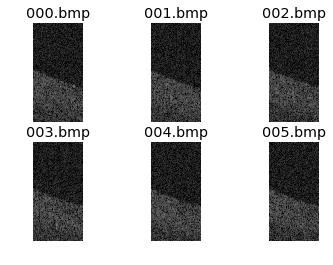

In [5]:
X_test = []
X_name = []
y_test = []
for train_image in train_images:
    # Read the image
#     print train_image
#     print type(train_image)
    im = cv2.imread(train_image)
    # Convert to grayscale as LBP works on grayscale image
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    radius = 3
    # Number of points to be considered as neighbourers 
    no_points = 8 * radius
    # Uniform LBP is used
    lbp = local_binary_pattern(im_gray, no_points, radius, method='uniform')
#     (histo, _) = np.histogram(lbp.ravel(),bins=np.arange(0, no_points + 3),range=(0, no_points + 2))
#     histo /= (histo.sum())
#     # Calculate the histogram lbp
    x = itemfreq(lbp.ravel())
    lbp_hist = (lbp.ravel())
#     # Normalize the lbp
    lbp_hist = x[:, 1]/sum(x[:, 1])
    lbp_hist = lbp_hist.astype('float')
    #compute the histogram
    hist = cv2.calcHist([im_gray],[0],None,[64],[0,256])
    hist = cv2.normalize(hist,hist)
    hist = hist.flatten()
#     hist,bins = np.histogram(im.flatten(),64,[0,256])
#     y = itemfreq(hist.ravel())
#     y = y.astype('float64')
    #nomralise the histogram
#     histogram =y[:, 1]/sum(y[:, 1])
    # concatenate lbp and histogram
    feature = np.concatenate((lbp_hist,hist),axis =0)
    # Append image path in X_name
    X_name.append(train_image)
    # Append histogram to X_name
    X_test.append(feature)
    # Append class label in y_test
    y_test.append(train_dic[train_image])    
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows,ncols)
for row in range(nrows):
    for col in range(ncols):
        axes[row][col].imshow(cv2.cvtColor(cv2.imread(X_name[row*ncols+col]), cv2.COLOR_BGR2RGB))
        axes[row][col].axis('off')
        axes[row][col].set_title("{}".format(os.path.split(X_name[row*ncols+col])[1]))

In [9]:
print y_test

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 

<type 'str'>
<type 'numpy.ndarray'>
(121, 61)
('histo:', array([ 0.09090909,  0.05487061,  0.02276114,  0.01029671,  0.00596125,
        0.00284514,  0.00189676,  0.00216773,  0.00176128,  0.00176128,
        0.00203224,  0.00257418,  0.00406449,  0.00284514,  0.00284514,
        0.00487739,  0.00298063,  0.00419997,  0.00176128,  0.00257418,
        0.00392901,  0.00785801,  0.01368378,  0.04525132,  0.08318656,
        0.62010568]))
(26,)
('hist:', array([ 0.09090909,  0.05487061,  0.02276114,  0.01029671,  0.00596125,
        0.00284514,  0.00189676,  0.00216773,  0.00176128,  0.00176128,
        0.00203224,  0.00257418,  0.00406449,  0.00284514,  0.00284514,
        0.00487739,  0.00298063,  0.00419997,  0.00176128,  0.00257418,
        0.00392901,  0.00785801,  0.01368378,  0.04525132,  0.08318656,
        0.62010568]))
(26,)


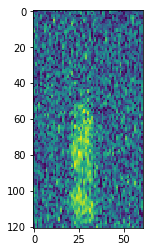

In [20]:
img= train_images[192]
print type(img)
im = cv2.imread(img)
print type(im)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
matplotlib.pyplot.imshow(im_gray)

# hist = cv2.calcHist([im_gray],[0],None,[64],[0,256])
# hist = cv2.normalize(hist,hist)
# print hist
# plt.hist(im_gray.ravel(),64,[0,256]); plt.show()
# smallest = numpy.amin(im)
# biggest = numpy.amax(im)
# print ("original_histogram",hist.shape)
# ac = itemfreq(hist.ravel())
# print ("histogram:",ac)
# print ("histogram_shape:",ac.shape)
radius = 3
no_points = 8 * radius
eps=1e-7
lbp = local_binary_pattern(im_gray, no_points, radius, method='uniform')
print lbp.shape
# print ("Original_lbp:",lbp.shape)
(histo, _) = np.histogram(lbp.ravel(),bins=np.arange(0, no_points + 3),range=(0, no_points + 2))
histo = hist.astype("float")
histo /= (hist.sum())
print ("histo:",histo) 
print histo.shape
# print lbp.shape
x = itemfreq(lbp.ravel())
hist = x[:, 1]/sum(x[:, 1])
# print hist.dtype
hist = hist.astype('float')
print ("hist:",hist)
print histo.shape

# hist1,bins = np.histogram(im.flatten(),64,[0,256])
# y = itemfreq(hist1.ravel())
# y = y.astype('float64')
# print y[:, 1]
# print ("sum",sum(y[:, 1]))
# print y[:, 1]/sum(y[:, 1])
# histogram =y[:, 1]/sum(y[:, 1])
# histogram =histogram.astype('float')





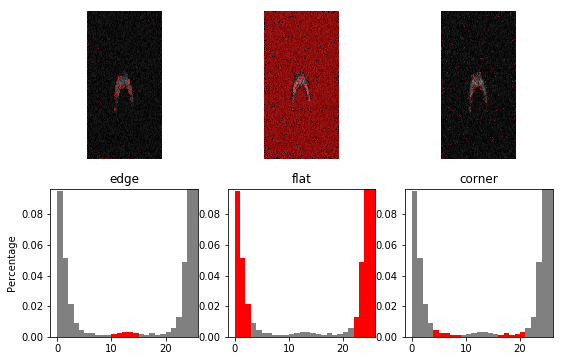

In [23]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb

# settings for LBP
radius = 3
n_points = 8 * radius


def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('r')


# image = data.load(im)
lbp = local_binary_pattern(im_gray, no_points, radius, method='uniform')


def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), normed=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')


# plot histograms of LBP of textures
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
plt.gray()

titles = ('edge', 'flat', 'corner')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4            # 1/4th of the histogram
i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                 list(range(i_34 - w, i_34 + w + 1)))

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(im_gray, lbp, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp)
    highlight_bars(bars, labels)
    ax.set_ylim(ymax=np.max(counts[:-1]))
    ax.set_xlim(xmax=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')

('lbp:', array([[25., 25., 10., ..., 25., 25.,  7.],
       [25., 10., 25., ...,  2., 25., 25.],
       [11., 25., 25., ...,  0.,  3.,  0.],
       ...,
       [25.,  0.,  2., ..., 25., 25., 25.],
       [ 3.,  3., 25., ..., 25., 25., 25.],
       [ 1.,  1.,  6., ..., 25.,  0., 25.]]))


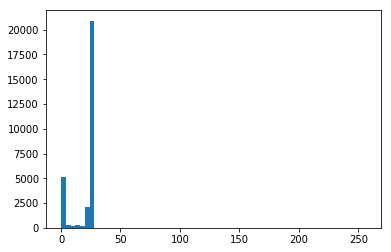

[ 2769  1498   627   259   131    78    66    39    40    40    55    74
    91    83    67    61    41    79    35    52    82   174   379  1431
  2822 18088]
[ 2769.  1498.   627.   259.   131.    78.    66.    39.    40.    40.
    55.    74.    91.    83.    67.    61.    41.    79.    35.    52.
    82.   174.   379.  1431.  2822. 18088.]
2769.0
29161.0
[0.09495559 0.05136998 0.02150132 0.00888173 0.0044923  0.00267481
 0.0022633  0.0013374  0.0013717  0.0013717  0.00188608 0.00253764
 0.00312061 0.00284627 0.00229759 0.00209183 0.00140599 0.0027091
 0.00120023 0.0017832  0.00281197 0.00596687 0.01299681 0.04907239
 0.09677309 0.62028051]


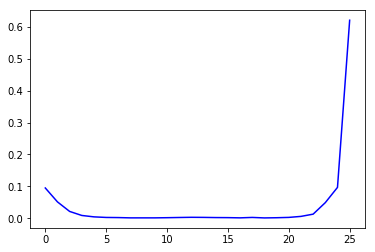

In [17]:
img= train_images[192]
im = cv2.imread(img)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
radius = 3
no_points = 8 * radius
# lbp = local_binary_pattern(im_gray, no_points, radius, method='uniform')
# print lbp.shape
# print lbp
# print lbp
# x = itemfreq(lbp.ravel())
# print x[:, 1]
# hist = x[:, 1]/sum(x[:, 1])
# print hist
# sumed =sum(x[:, 1])
# ch = 7.24000000e+02/sumed
# print np.array(ch)
lbp = local_binary_pattern(im_gray,no_points,radius, method="uniform")
print("lbp:",lbp)
plt.hist(lbp.ravel(),64,[0,256]); plt.show()
(hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, no_points + 3),range=(0, no_points + 2))
# plt.plot(cdf_normalized, color = 'b')
print hist
hist = hist.astype('float')
print hist
eps=1e-7
print hist[0]
print hist.sum()
hist /= (hist.sum() + eps)
plt.plot(hist, color = 'b')
print hist


In [6]:
print len(X_test)
print len(y_test)
import pandas as pd
S =pd.DataFrame(X_test)
T = pd.DataFrame(y_test)
S =S.fillna(0)
T =T.fillna(0)
print type(S)
S = S.values.tolist()
T = T.values.tolist()
print (("length S1:",len(S)),"length T1:",len(T))

2989
2989
<class 'pandas.core.frame.DataFrame'>
(('length S1:', 2989), 'length T1:', 2989)


In [10]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

Train_x Shape ::  2391
Train_y Shape ::  2391
Test_x Shape ::  598
Test_y Shape ::  598
GridSearchCV took 254.65 seconds for 100 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.938 (std: 0.070)
Parameters: {'bootstrap': False, 'min_samples_leaf': 4, 'n_estimators': 64, 'min_samples_split': 9, 'criterion': 'entropy', 'max_features': 5, 'max_depth': 10}

Model with rank: 2
Mean validation score: 0.938 (std: 0.065)
Parameters: {'bootstrap': True, 'min_samples_leaf': 8, 'n_estimators': 48, 'min_samples_split': 5, 'criterion': 'gini', 'max_features': 8, 'max_depth': 30}

Model with rank: 3
Mean validation score: 0.936 (std: 0.073)
Parameters: {'bootstrap': False, 'min_samples_leaf': 4, 'n_estimators': 78, 'min_samples_split': 4, 'criterion': 'gini', 'max_features': 8, 'max_depth': 40}

('\nbest_model:\n', RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='entropy', max_depth=10, max_features=5,
            max_leaf_nodes=None, m

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


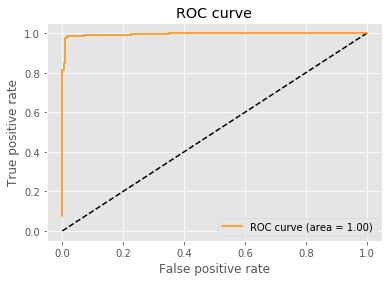

╒═══════════╤══════════╕
│ Metric    │     Test │
╞═══════════╪══════════╡
│ accuracy  │ 0.994983 │
├───────────┼──────────┤
│ precision │ 1        │
├───────────┼──────────┤
│ F1        │ 0.996226 │
├───────────┼──────────┤
│ r2        │ 0.977406 │
├───────────┼──────────┤
│ AUC       │ 0.996241 │
╘═══════════╧══════════╛


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from time import time
train_x, test_x, train_y, test_y = train_test_split(S,T,train_size=0.8)
# print train_x
# print type(train_x[0])
# print X_test
# print train_y
print "Train_x Shape :: ", len(train_x)
print "Train_y Shape :: ", len(train_y)
print "Test_x Shape :: ", len(test_x)
print "Test_y Shape :: ", len(test_y)
param_grid = {"n_estimators": range(20, 100, 2),
                  "max_depth": range(4, 50, 2),
                  "min_samples_leaf": range(2, 100, 2),
                  "max_features": sp_randint(1, 10),
                  "min_samples_split": sp_randint(2, 10),
                  "bootstrap": [True, False],
                  "criterion": ["gini", "entropy"]}

clf =  RandomForestClassifier(class_weight = 'balanced')
n_iter_search = 100
estimator = RandomizedSearchCV(clf,param_distributions = param_grid,n_iter = n_iter_search,scoring = 'roc_auc',verbose = 0,
                               n_jobs = 1)
start = time()
# T = label_binarize(T, classes=[0, 1, 2])
fit =  estimator.fit(S, T)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(estimator.cv_results_['params'])))
report(estimator.cv_results_)

    # Cross validation with 20 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
cv_ = ShuffleSplit(n_splits = 20, test_size = 0.30, random_state = 0)
#     Plot_learning_curve(estimator, 
#                         'Learning Curves',
#                         X_train, y_train, 
#                         cv = cv_,
#                         n_jobs = 1)
     
#     Report_scores(estimator.cv_results_, n_top = 3)
    
best_model = estimator.best_estimator_
print('\nbest_model:\n', best_model)
#     print('\nFeature Importances:', best_model.feature_importances_)
#     Plot_predictor_importance(best_model, feature_columns)
# Plot_learning_curve(estimator, 
#                         'Learning Curves',
#                         train_x, train_y, 
#                         cv = cv_,
#                         n_jobs = 1)
y_predicted = best_model.predict(test_x)
probabilities = best_model.predict_proba(test_x)

y_predicted = best_model.predict(test_x)
probabilities = best_model.predict_proba(test_x)
print type(test_y)
# print test_y(1), predictions(1)
for i in xrange(0, 5):
        print "Actual outcome :: {} and Predicted outcome :: {}".format(list(test_y)[i], y_predicted[i].round())
print "Train Accuracy :: ", accuracy_score(train_y, best_model.predict(train_x))
print "Test Accuracy  :: ", accuracy_score(test_y, y_predicted)
print "Confusion matrix ::", confusion_matrix(test_y, y_predicted)
print "MSE ::",             metrics.mean_squared_error(test_y, y_predicted)
# logloss_test    = metrics.log_loss(test_y, predictions)
accuracy_test   = metrics.accuracy_score(test_y, y_predicted)
F1_test         = metrics.f1_score(test_y, y_predicted)
precision_test  = precision_score(test_y, y_predicted, average='binary')
recall_test     = recall_score(test_y, y_predicted, average='binary')
auc_test        = metrics.roc_auc_score(test_y, y_predicted)
r2_test         = metrics.r2_score(test_y, y_predicted)
header = ["Metric", "Test"]
table  = [
#                ["logloss",   logloss_test],
               ["accuracy",  accuracy_test],
               ["precision", precision_test],
               ["F1",        F1_test],
               ["r2",        r2_test],
               ["AUC",       auc_test]
             ]
auc = roc_auc_score(test_y, y_predicted)
ROC_Curve(best_model, auc)
print(tabulate(table, header, tablefmt="fancy_grid"))

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from time import time
train_x, test_x, train_y, test_y = train_test_split(S,T,train_size=0.8)
# print train_x
# print type(train_x[0])
# print X_test
# print train_y
print "Train_x Shape :: ", len(train_x)
print "Train_y Shape :: ", len(train_y)
print "Test_x Shape :: ", len(test_x)
print "Test_y Shape :: ", len(test_y)
    
trained_model = random_forest_classifier(train_x,train_y)
print "Trained model :: ", trained_model
predictions = trained_model.predict(test_x)

print type(test_y)
# print test_y(1), predictions(1)
for i in xrange(0, 5):
        print "Actual outcome :: {} and Predicted outcome :: {}".format(list(test_y)[i], predictions[i])
print "Train Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x))
print "Test Accuracy  :: ", accuracy_score(test_y, predictions)
print "Confusion matrix ::", confusion_matrix(test_y, predictions)
print "MSE ::",             metrics.mean_squared_error(test_y, predictions)
# logloss_test    = metrics.log_loss(test_y, predictions)
accuracy_test   = metrics.accuracy_score(test_y, predictions)
F1_test         = metrics.f1_score(test_y, predictions)
precision_test  = precision_score(test_y, predictions, average='binary')
recall_test     = recall_score(test_y, predictions, average='binary')
auc_test        = metrics.roc_auc_score(test_y, predictions)
r2_test         = metrics.r2_score(test_y, predictions)
header = ["Metric", "Test"]
table  = [
#                ["logloss",   logloss_test],
               ["accuracy",  accuracy_test],
               ["precision", precision_test],
               ["F1",        F1_test],
               ["r2",        r2_test],
               ["AUC",       auc_test]
             ]

print(tabulate(table, header, tablefmt="fancy_grid"))
y_predicted = trained_model.predict(train_x)
probabilities = trained_model.predict_proba(train_x)
ROC_Curve(trained_model, auc)
# c_report = classification_report(y_train, y_predicted)
# print('\nClassification report:\n', c_report)
# y_predicted_train = best_model.predict(X_train)
# cm = confusion_matrix(y_train, y_predicted_train)
# auc = roc_auc_score(train_y, y_predicted_train)
# Print_confusion_matrix(cm, auc, 'Confusion matrics of the training dataset')

Train_x Shape ::  2391
Train_y Shape ::  2391
Test_x Shape ::  598
Test_y Shape ::  598


NameError: name 'random_forest_classifier' is not defined

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


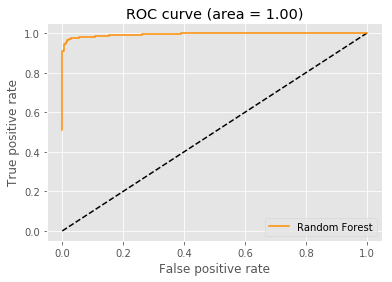

In [37]:
ROC_Curve(best_model, auc)

In [24]:
y_predicted = best_model.predict(test_x)
probabilities = best_model.predict_proba(test_x)
print type(test_y)
# print test_y(1), predictions(1)
for i in xrange(0, 5):
        print "Actual outcome :: {} and Predicted outcome :: {}".format(list(test_y)[i], y_predicted[i])
print "Train Accuracy :: ", accuracy_score(train_y, best_model.predict(train_x))
print "Test Accuracy  :: ", accuracy_score(test_y, y_predicted)
print "Confusion matrix ::", confusion_matrix(test_y, y_predicted)
print "MSE ::",             metrics.mean_squared_error(test_y, y_predicted)
# logloss_test    = metrics.log_loss(test_y, predictions)
accuracy_test   = metrics.accuracy_score(test_y, y_predicted)
F1_test         = metrics.f1_score(test_y, y_predicted)
precision_test  = precision_score(test_y, y_predicted, average='binary')
recall_test     = recall_score(test_y, y_predicted, average='binary')
auc_test        = metrics.roc_auc_score(test_y, y_predicted)
r2_test         = metrics.r2_score(test_y, y_predicted)
header = ["Metric", "Test"]
table  = [
#                ["logloss",   logloss_test],
               ["accuracy",  accuracy_test],
               ["precision", precision_test],
               ["F1",        F1_test],
               ["r2",        r2_test],
               ["AUC",       auc_test]
             ]

print(tabulate(table, header, tablefmt="fancy_grid"))

<type 'list'>
Actual outcome :: [0] and Predicted outcome :: 0
Actual outcome :: [1] and Predicted outcome :: 1
Actual outcome :: [1] and Predicted outcome :: 1
Actual outcome :: [1] and Predicted outcome :: 1
Actual outcome :: [1] and Predicted outcome :: 1
Train Accuracy ::  0.9962358845671268
Test Accuracy  ::  0.9916387959866221
Confusion matrix :: [[185   1]
 [  4 408]]
MSE :: 0.008361204013377926
╒═══════════╤══════════╕
│ Metric    │     Test │
╞═══════════╪══════════╡
│ accuracy  │ 0.991639 │
├───────────┼──────────┤
│ precision │ 0.997555 │
├───────────┼──────────┤
│ F1        │ 0.99391  │
├───────────┼──────────┤
│ r2        │ 0.960982 │
├───────────┼──────────┤
│ AUC       │ 0.992457 │
╘═══════════╧══════════╛


In [14]:
def ROC_Curve(rf, auc):
    one_hot_encoder = OneHotEncoder()
    rf_fit = rf.fit(train_x, train_y)
    fit = one_hot_encoder.fit(rf.apply(train_x))
    y_predicted = rf.predict_proba(test_x)[:, 1]
    false_positive, true_positive, _ = roc_curve(test_y, y_predicted)

    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_positive, true_positive, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [15]:
def Print_confusion_matrix(cm, auc, heading):
    print('\n', heading)
    print(cm)
    true_negative  = cm[0,0]
    true_positive  = cm[1,1]
    false_negative = cm[1,0]
    false_positive = cm[0,1]
    total = true_negative + true_positive + false_negative + false_positive
    accuracy = (true_positive + true_negative)/total
    precision = (true_positive)/(true_positive + false_positive)
    recall = (true_positive)/(true_positive + false_negative)
    misclassification_rate = (false_positive + false_negative)/total
    F1 = (2*true_positive)/(2*true_positive + false_positive + false_negative)
    print('accuracy.................%7.4f' % accuracy)
    print('precision................%7.4f' % precision)
    print('recall...................%7.4f' % recall)
    print('F1.......................%7.4f' % F1)
    print('auc......................%7.4f' % auc)

In [27]:
def Plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, y,
                                                            cv = cv,
                                                            n_jobs = n_jobs,
                                                            train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return

In [13]:
def Plot_predictor_importance(best_model, feature_columns):
    feature_importance = best_model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    y_pos  = np.arange(sorted_idx.shape[0]) + .5
    fig, ax = plt.subplots()
    ax.barh(y_pos, 
            feature_importance[sorted_idx], 
            align='center', 
            color='green', 
            ecolor='black', 
            height=0.5)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(feature_columns)
    ax.invert_yaxis()
    ax.set_xlabel('Relative Importance')
    ax.set_title('Predictor Importance')
    plt.show()

In [12]:
def Plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, y,
                                                            cv = cv,
                                                            n_jobs = n_jobs,
                                                            train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return

In [11]:
def Report_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [10]:
def Random_Search():
    global best_model, saved_moldel
    
    param_grid = {"n_estimators": range(20, 100, 2),
                  "max_depth": range(4, 50, 2),
                  "min_samples_leaf": range(2, 100, 2),
                  "max_features": sp_randint(1, 10),
                  "min_samples_split": sp_randint(2, 10),
                  "bootstrap": [True, False],
                  "criterion": ["gini", "entropy"]}

    clf = RandomForestClassifier(class_weight = 'balanced')
    n_iter_search = 500
    estimator = RandomizedSearchCV(clf,
                                   param_distributions = param_grid,
                                   n_iter = n_iter_search,
                                   scoring = 'roc_auc',
                                   verbose = 0,
                                   n_jobs = 1)
        
    fit = estimator.fit(S, T)

    # Cross validation with 20 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv_ = ShuffleSplit(n_splits = 20, test_size = 0.30, random_state = 0)
#     Plot_learning_curve(estimator, 
#                         'Learning Curves',
#                         X_train, y_train, 
#                         cv = cv_,
#                         n_jobs = 1)
     
#     Report_scores(estimator.cv_results_, n_top = 3)
    
    best_model = estimator.best_estimator_
    print('\nbest_model:\n', best_model)

#     print('\nFeature Importances:', best_model.feature_importances_)
#     Plot_predictor_importance(best_model, feature_columns)

    y_predicted = best_model.predict(train_x)
    probabilities = best_model.predict_proba(train_x)

    c_report = classification_report(train_y, y_predicted)
    print('\nClassification report:\n', c_report)

    y_predicted_train = best_model.predict(train_x)
    cm = confusion_matrix(train_x, y_predicted_train)
    auc = roc_auc_score(train_y, y_predicted_train)
    Print_confusion_matrix(cm, auc, 'Confusion matrics of the training dataset')

    y_predicted = best_model.predict(test_X)
    cm = confusion_matrix(test_x, y_predicted)
    auc = roc_auc_score(test_x, y_predicted)

    ntotal = len(test_x)
    correct = test_y == y_predicted
    numCorrect = sum(correct)
    percent = round( (100.0*numCorrect)/ntotal, 6)
    print("\nCorrect classifications on test data: {0:d}/{1:d} {2:8.3f}%".format(numCorrect, ntotal, percent))
    prediction_score = 100.0*best_model.score(test_x, test_y)
    print('Random Forest Prediction Score on test data: %8.3f' % prediction_score)

    model_path = 'sklearn_rf_classify.pkl'
    joblib.dump(best_model, model_path)

    saved_model = joblib.load(model_path)
    y_predicted_test = best_model.predict(test_x)
    cm = confusion_matrix(test_y, y_predicted_test)
    auc = roc_auc_score(test_y, y_predicted_test)
    Print_confusion_matrix(cm, auc, 'Confusion matrics of the test dataset')
    ROC_Curve(best_model, auc)
    Print_Metrics(saved_model)
    return

In [18]:
Random_Search()

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


('\nbest_model:\n', RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='entropy', max_depth=12, max_features=8,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            n_estimators=26, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))


TypeError: unhashable type: 'list'

In [16]:
seed = 123
# RFC with fixed hyperparameters max_depth, max_features and min_samples_leaf
rfc = RandomForestClassifier(n_jobs=-1, oob_score = True, max_depth=10, max_features='sqrt', min_samples_leaf = 1) 
 
# Range of `n_estimators` values to explore.
n_estim = filter(lambda x: x % 2 == 0, list(range(10,100)))
 
cv_scores = []
 
for i in n_estim:
    rfc.set_params(n_estimators=i)
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    scores = model_selection.cross_val_score(rfc, train_x, train_y, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    
optimal_n_estim = n_estim[cv_scores.index(max(cv_scores))]
print "The optimal number of estimators is %d with %0.1f%%" % (optimal_n_estim, cv_scores[optimal_n_estim])
 
plt.plot(n_estim, cv_scores)
plt.xlabel('Number of Estimators')
plt.ylabel('Train Accuracy')
plt.show()

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


IndexError: list index out of range

In [8]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
a = np.array(train_x)
b = np.array(train_y)
print a
print b

[[0.09152635 0.05092418 0.02270155 ... 0.         0.         0.        ]
 [0.08778848 0.04790645 0.02246151 ... 0.         0.         0.        ]
 [0.09835054 0.04101368 0.02897706 ... 0.         0.         0.        ]
 ...
 [0.09317239 0.05459346 0.02328452 ... 0.         0.         0.        ]
 [0.09385824 0.0458832  0.03100031 ... 0.         0.         0.        ]
 [0.0913206  0.04910668 0.02366174 ... 0.         0.         0.        ]]
[[1]
 [1]
 [0]
 ...
 [1]
 [0]
 [1]]


[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
('binarize_y:', array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]]))
[0 1 0]
3


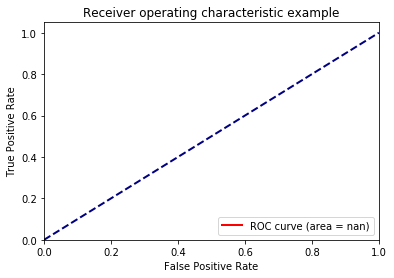

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
X = np.array(S)
y = np.array(T)
print y
# Binarize the output
y = label_binarize(y, classes=[0, 1,2])
print ('binarize_y:',y)
print y[-1]
n_classes = y.shape[1]
print (n_classes)

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=44))
y_score    = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [15]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.99


/usr/local/lib/python2.7/dist-packages/sklearn/metrics/ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Text(0.5,1,u'Average precision score, micro-averaged over all classes: AP=0.94')

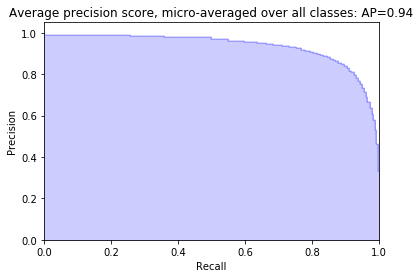

In [12]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [17]:
from sklearn.metrics import classification_report
print("Classification report for classifier %s:\n%s\n"
      % (classifier, classification_report(y_test, y_score)))

ValueError: Mix type of y not allowed, got types set(['continuous-multioutput', 'multilabel-indicator'])